# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Graphs without labels (or units when appropriate) are not worth any point.
3. Do put in sufficient explanatory comments in your code.
4. Functions are very important. Do look up the video on the Safari O'Reilly ressource if you are still not clear on them !

For this week you can use these imports at the start of your programs:

In [1]:
# Import the numpy library for numerical operations, aliasing it as 'np'
import numpy as np
# Import the matplotlib.pyplot module for plotting, aliasing it as 'plt'
import matplotlib.pyplot as plt

We will use a new module `uncertainties`, which is **not** standard in the colab environment. You will have to first run:

In [2]:
# Install the 'uncertainties' library silently using pip
! pip install -q uncertainties

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.9 MB/s eta 0:00:00


To install the module before you can import it:

In [3]:
# Import the 'uncertainties' library, aliasing it as 'uc'
import uncertainties as uc
# Import the 'uncertainties.umath' module for mathematical functions with uncertainties, aliasing it as 'um'
import uncertainties.umath as um # for maths functions

# Introduction
In the practical classes PX2133/PX2233 and PX2338 (Obs tech), as well as your year 3/4 project, a lot of emphasis is placed on the determination and mathematical handling of errors.
The uncertainties module allows us to deal very easily with [error propagation](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). For this sheet you should remind yourself about error bars in measurements and about propagation of uncertainties. Take an example from your lab handbook:

**Example 1**: If the length of a rectangle is $1.24\pm0.02 m$ and its breadth is $0.61\pm0.01 m$, what is its area and the error in the area? The following code snippet solves this problem in a few lines.

In [4]:
# Define the length L with its nominal value and uncertainty using ufloat
L = uc.ufloat(1.24, 0.02)
# Define the width W with its nominal value and uncertainty using ufloat
W = uc.ufloat(0.61, 0.01)
# Calculate the area (L*W) and print it along with its uncertainty and units
print ('Area is:', L*W, 'm^2') # Do remember to add the units when printing!

Area is: 0.756+/-0.017 m^2


**Note**: For the area itself, it's fairly straightforward:

In [5]:
# Calculate the nominal value of the area
1.24*0.61

0.7564

However, for the error bar on this number:

In [6]:
# Attempt to multiply uncertainties directly, which is incorrect for error propagation
0.02*0.01

0.0002

does not work. Instead, the [error progation formula](https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae) gives:

In [7]:
# Calculate the error in the area using the error propagation formula for multiplication:
# |(L*W)| * sqrt((dL/L)^2 + (dW/W)^2)
np.abs(1.24*0.61)*np.sqrt((0.02/1.24)**2+(0.01/0.61)**2)

np.float64(0.01739540169125163)

So the area is $0.756\pm0.017 m^2$. `uncertainties` obviously saves a lot of work, even for such a simple case. You can also take a look at the web site uncertainties hosted at https://pythonhosted.org/uncertainties/user_guide.html. In particular, [this section](https://pythonhosted.org/uncertainties/user_guide.html#access-to-the-uncertainty-and-to-the-nominal-value) shows some of the properties of a `ufloat` you can access directly.

**Example 2**: A reference object is $10.0\pm0.0001 m$ long, and makes a viewing angle of $0.62\pm0.02 rad$. How far is it?

In [8]:
# Define the length L with its nominal value and uncertainty
L = uc.ufloat(10.0, 0.0001)
# Define the angle theta with its nominal value and uncertainty
theta = uc.ufloat(0.62,0.02)

# Calculate the distance using the formula, ensuring to use um.tan for uncertainty propagation
Distance = (L/2)/um.tan(theta/2)

# Print the nominal value and standard deviation (error) of the calculated distance
print ('Distance is:', Distance.nominal_value, 'm, with an error of:', Distance.std_dev)

Distance is: 15.609024890896208 m, with an error of: 0.537283338762715


Note the need to use "umath" functions (like `um.tan()` instead of `np.tan()`), and how to get the nominal value and the standard deviation of the uncertainties objects. To get nicer looking output, such as controlling the number of significant digits printed, you can use the information about formatting at https://docs.python.org/3/tutorial/inputoutput.html. In the exercises below you need to print the values to the screen. (Don’t forget units.)

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0
[0] With some approximations, we have measured the mass of the following black-holes:
```
"35.6+/-3.9","30.6+/-3.7","63.1+/-3.2","23.2+/-9.8","13.6+/-4.5","35.7+/-6.8","13.7+/-6.0","7.7+/-2.4","20.5+/-4.0"
```
Compute for each (with error-bars) their lifetime due to Hawking radiation:
$$
t = \left(\frac{M}{M_{\odot}}\right)^3\,\times\,2.097\,\times\,10^{67} yr
$$

(this exercise is for demonstration purposes and won't be marked)

In [9]:
import uncertainties as uc
import uncertainties.umath as um

# Black hole masses provided as strings in the format "value+/-error"
mass_strings = ["35.6+/-3.9", "30.6+/-3.7", "63.1+/-3.2", "23.2+/-9.8", "13.6+/-4.5", "35.7+/-6.8", "13.7+/-6.0", "7.7+/-2.4", "20.5+/-4.0"]

# Initialize an empty list to store ufloat objects for masses
masses = []
# Loop through each mass string, parse it, and convert it to a ufloat object
for s in mass_strings:
    # Split the string into nominal value and error parts
    value_str, error_str = s.split('+/-')
    # Create a ufloat object and append it to the masses list
    masses.append(uc.ufloat(float(value_str), float(error_str)))

# Define the solar mass (M_solar) as a ufloat. Assuming M in the input strings are in solar masses,
# M_solar is treated as 1.0 with no uncertainty for calculation of the ratio (M/M_solar).
M_solar = uc.ufloat(1.0, 0.0) # Represents 1 solar mass, no uncertainty given for the unit itself

# Define the constant factor from the Hawking radiation lifetime formula
constant = 2.097 * (10**67)

# Print a header for the results
print("Hawking Radiation Lifetimes:")
# Iterate through the list of black hole masses with their index
for i, M in enumerate(masses):
    # Calculate lifetime 't' using the given formula: t = (M / M_solar)^3 * constant
    # The uncertainties library automatically propagates errors through these operations
    t = (M / M_solar)**3 * constant
    # Print the calculated lifetime for each black hole, including its uncertainty, in years
    print(f"Black Hole {i+1}: {t} yr")

Hawking Radiation Lifetimes:
Black Hole 1: (9.5+/-3.1)e+71 yr
Black Hole 2: (6.0+/-2.2)e+71 yr
Black Hole 3: (5.3+/-0.8)e+72 yr
Black Hole 4: (2.6+/-3.3)e+71 yr
Black Hole 5: (5+/-5)e+70 yr
Black Hole 6: (1.0+/-0.5)e+72 yr
Black Hole 7: (5+/-7)e+70 yr
Black Hole 8: (1.0+/-0.9)e+70 yr
Black Hole 9: (1.8+/-1.1)e+71 yr


/usr/local/lib/python3.12/dist-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


## Exercise 1
[2] An object is measured to travel a distance $x = 5.1 \pm 0.4 m$ during a time of $t = 0.4 \pm 0.1 s$. What is the average velocity and the error in the average velocity?

In [10]:
# Define distance x with its nominal value and uncertainty
x=uc.ufloat(5.1, 0.4)
# Define time t with its nominal value and uncertainty
t=uc.ufloat(0.4, 0.1)

# Calculate the average velocity (x/t) and print it along with its uncertainty and units
print('The average velocity is:', x/t, 'm/s')

The average velocity is: 12.7+/-3.3 m/s


## Exercise 2
[2] An enterprising cow attempts to jump over the moon by jumping vertically into the air with initial speed $v_0=4.0\pm0.2 m/s$. After a time $t=0.60\pm0.06s$, the height of the cow is $h = v_0t-\frac{1}{2}g t^2 = 0.636 m$. What is the uncertainty in $h$? Take $g$ as exactly $9.81 ms^{-2}$.

In [11]:
# Define initial speed v with its nominal value and uncertainty
v = uc.ufloat(4.0, 0.2)
# Define time t with its nominal value and uncertainty
t = uc.ufloat(0.60, 0.06)
# Define gravitational acceleration g as an exact value (no uncertainty)
g = 9.81

# Calculate the height h using the kinematic equation h = v*t - 0.5*g*t**2
# The uncertainties library propagates errors through this calculation
h = v*t - 0.5*g*t**2

# Print the calculated height h, including its uncertainty, in meters
print('The height of the cow is:', h, 'm')

The height of the cow is: 0.63+/-0.16 m


## Exercise 3
[2] In an optics experiment the object distance $u$ is measured to be 20cm and the image distance $v$ is 10cm, both to an accuracy of 0.5cm. Find the focal length $f$ of the lens using the formula:

$$ \frac{1}{u}+\frac{1}{v}=\frac{1}{f}$$

In [12]:
# Define object distance u with its nominal value and uncertainty
u=uc.ufloat(20, 0.5)
# Define image distance v with its nominal value and uncertainty
v=uc.ufloat(10, 0.5)

# Calculate 'f' based on the current code: f = 1 / (u + v)
# Note: The problem statement gives the lens formula as 1/u + 1/v = 1/f.
f=1/(u+v)

# Print the calculated 'f', including its uncertainty, in cm
print('The focal length of the lens is:', f, 'cm')

The focal length of the lens is: 0.0333+/-0.0008 cm


## Exercise 4
[2] Two students each measure the refractive index of water. Jack measures a value of $1.33 \pm 0.03$ while Jill measures $1.28 \pm 0.02$. Are these values in agreement? *You do have to think a bit about this one...*

In [13]:
# Define Jack's measured refractive index with its nominal value and uncertainty
ri_jack = uc.ufloat(1.33, 0.03)
# Define Jill's measured refractive index with its nominal value and uncertainty
ri_jill = uc.ufloat(1.28, 0.02)

# Calculate the difference between their measurements and print it, including the propagated uncertainty
print('The difference between Jack and Jill is:', ri_jack - ri_jill)

The difference between Jack and Jill is: 0.05+/-0.04


## Exercise 5
[2] The damped resonance frequency $\omega_{res}$ of an oscillating system is related to the (un-damped) natural angular frequency $\omega_0$ and the damping coefficient $\alpha$ by:

$$\omega_{res} = \sqrt{ \omega_0^2 - 2\alpha^2}$$

Find $f_0$ if the measured resonance frequency $f_{res}$ is $23.2\pm0.1 Hz$ and the measured damping coefficient is $19.5\pm0.5s^{-1}$.


In [14]:
# Define the measured resonance frequency fres with its nominal value and uncertainty
fres = uc.ufloat(23.2, 0.1)
# Define the measured damping coefficient a with its nominal value and uncertainty
a = uc.ufloat(19.5, 0.5)

# Convert resonance frequency (Hz) to angular resonance frequency (rad/s)
Wres = 2*np.pi*fres

# Calculate the undamped natural angular frequency W0 using the rearranged formula:
# Wres^2 = W0^2 - 2*alpha^2  => W0^2 = Wres^2 + 2*alpha^2 => W0 = sqrt(Wres^2 + 2*alpha^2)
W0 = (Wres**2 + 2*a**2)**(1/2)

# Convert undamped natural angular frequency (rad/s) back to natural frequency (Hz)
f0 = W0/(2*np.pi)

# Print the calculated natural frequency f0, including its uncertainty, in Hz
print('The natural frequency is:', f0, 'Hz')

The natural frequency is: 23.61+/-0.10 Hz


## Exercise 6
[2] Suppose you have the following equation from one of your lab experiments:

$$f=\frac{c}{2}\sqrt{\frac{n_x^2}{L_x^2}+\frac{n_y^2}{L_y^2}+\frac{n_z^2}{L_z^2}}$$

where $f$ is the resonant frequency of sound waves in a box of sides $L_x$, $L_y$ and $L_z$ in length and the $n_x$ etc. are integers. $L_x = 10.2\pm0.2m$, $L_y = 5.2\pm0.3m$ and $L_z = 20.0\pm0.1 m$, while $c = 331.3 + T * 0.606 \,m\,s^{-1}$ is the temperature-dependent speed of sound, and the temperature $T$ is $23 \pm 1^\circ C$.
Calculate $f$ and the error in $f$ for the following values of $(nx,ny,nz)= (1,1,1), (1,1,2)$ and $(2,1,1)$.


In [15]:
# Define the dimensions of the box Lx, Ly, Lz with their nominal values and uncertainties
L_x = uc.ufloat(10.2, 0.2)
L_y = uc.ufloat(5.2, 0.3)
L_z = uc.ufloat(20.0, 0.1)
# Define the temperature T with its nominal value and uncertainty
T = uc.ufloat(23, 1)
# Calculate the speed of sound c, incorporating its dependence on temperature T
c = 331.3 + T * 0.606

# Define a list of tuples for the integer quantum numbers (nx, ny, nz)
n_values = [(1, 1, 1), (1, 1, 2), (2, 1, 1)]

# Iterate through each set of (nx, ny, nz) values
for nx, ny, nz in n_values:
    # Calculate the resonant frequency f using the given formula
    # um.sqrt is used to correctly propagate uncertainties through the square root operation
    f = (c / 2) * um.sqrt((nx**2 / L_x**2) + (ny**2 / L_y**2) + (nz**2 / L_z**2))

    # Print the calculated resonant frequency f, including its uncertainty, for the current (nx, ny, nz) set
    print(f'For (nx, ny, nz) = ({nx}, {ny}, {nz}), the resonant frequency f is: {f} Hz')

For (nx, ny, nz) = (1, 1, 1), the resonant frequency f is: 38.2+/-1.7 Hz
For (nx, ny, nz) = (1, 1, 2), the resonant frequency f is: 41.1+/-1.6 Hz
For (nx, ny, nz) = (2, 1, 1), the resonant frequency f is: 48.2+/-1.4 Hz


## Exercise 7
[4] The reflection coefficient $R_\parallel$ for parallel plane-polarised light reflected from a surface is given by the equation:

$$ R_\parallel = \frac{\tan^2(\theta_i - \theta_t)}{\tan^2(\theta_i + \theta_t)} $$

Calculate the error in $R_\parallel$ given measurements $\theta_i = (78 \pm 1)^\circ$ and $\theta_t = (40 \pm 1)^\circ$.

In [16]:
# Define the incident angle Theta_i with its nominal value and uncertainty
Theta_i = uc.ufloat(78, 1)
# Define the transmitted angle Theta_t with its nominal value and uncertainty
Theta_t = uc.ufloat(40, 1)

# Calculate the reflection coefficient R_parallel using the given formula.
# 'um.tan' is used for the tangent function, ensuring uncertainty propagation.
R_parallel = (um.tan(Theta_i - Theta_t)**2)/(um.tan(Theta_i + Theta_t)**2)

# Print the standard deviation (error) of the calculated reflection coefficient, formatted to 2 significant figures.
print(f'The reflection coefficient is: {R_parallel.std_dev:2g}')

The reflection coefficient is: 0.0650677


## Exercise 8
[4] Calculate and print to the screen the fractional uncertainty, as a percentage to one
significant figure, of the fluid flow discharge coefficient $C_d$ from the equation

$$
C_d = \frac{\dot{m}\sqrt{1-\left(\frac{d}{D}\right)^4}}{Kd^2F\sqrt{\rho\Delta P}}
$$

where

\begin{align*}
    C_d &= \text{discharge coefficient}&& \text{(no units)} \\
    \dot{m} &= \text{mass flow rate}&& = 0.13 \pm 0.01kg\,s^{-1} \\
    d &= \text{orifice diameter}&& = 11\pm 1 mm \\
    D &= \text{pipe diameter}&& = 71 \pm 1 mm \\
    \rho &= \text{fluid density}&& =1.01\pm0.01g\,cm^{-3} \\
    \Delta P &= \text{differential pressure}&& =156 \pm 7 Pa \\
    K &= \text{a constant parameter}&& =\text{constant (no units)} \\
    F &= \text{thermal expansion factor}&& =\text{constant (no units)}
\end{align*}


In [17]:
# Define mass flow rate m with its nominal value and uncertainty
m = uc.ufloat(0.13, 0.01)
# Define orifice diameter d with its nominal value and uncertainty (converted to meters)
d = uc.ufloat(11e-3, 1e-3)
# Define pipe diameter D with its nominal value and uncertainty (converted to meters)
D = uc.ufloat(71e-3, 1e-3)
# Define fluid density rho with its nominal value and uncertainty (converted to kg/m^3)
rho = uc.ufloat(1.01e3, 0.01e3)
# Define differential pressure DeltaP with its nominal value and uncertainty
DeltaP = uc.ufloat(156, 7)
# Define constant K (no units, no uncertainty)
K = 1
# Define constant F (no units, no uncertainty)
F = 1

# Calculate the fluid flow discharge coefficient Cd using the given complex formula.
# 'um.sqrt' is used for square root operations to correctly propagate uncertainties.
Cd = (m * um.sqrt(1 - (d/D)**4)) / (K * d**2 * F * um.sqrt(rho * DeltaP))

# Calculate the fractional uncertainty as a percentage
# (standard deviation / nominal value) * 100
fractional_uncertainty = (Cd.std_dev / Cd.nominal_value) * 100

# Print the fractional uncertainty, formatted to one significant figure, with a '%' sign
print(f'The fractional uncertainty of the fluid flow discharge coefficient is: {fractional_uncertainty:.1g} %')

The fractional uncertainty of the fluid flow discharge coefficient is: 2e+01 %


## Exercise 9: Optional problem (not marked)
If you have time and want to try something interesting, do the following problem by plotting in 2D:
 - Draw an equilateral triangle with vertices and coordinates: vertex 1: $(p_1,q_1)$; vertex 2: $(p_2, q_2)$; vertex 3: $(p_3, q_3)$.
 - Place a dot at an arbitrary point $P = (x_0, y_0)$ within this triangle.
 - Find the next point by selecting randomly an integer $n = 1 , 2, $  or $3$ :
    1. If 1 , place a dot halfway between P and vertex 1.
    2. If 2 , place a dot halfway between P and vertex 2.
    3. If 3 , place a dot halfway between P and vertex 3.
 - Repeat the last two steps using the last dot as the new P.

Mathematically, the coordinates of successive points are given by the formulae

$$(x_{i+1},y_{i+1})=0.5[(x_i,y_i)+(p_n,q_n)]$$

and

$$n=int(1+3r_i),$$

where $r_i$ is a random number between 0 and 1 and where the $int()$ function outputs the closest integer smaller than or equal to the argument.

Try extending this to four vertices.

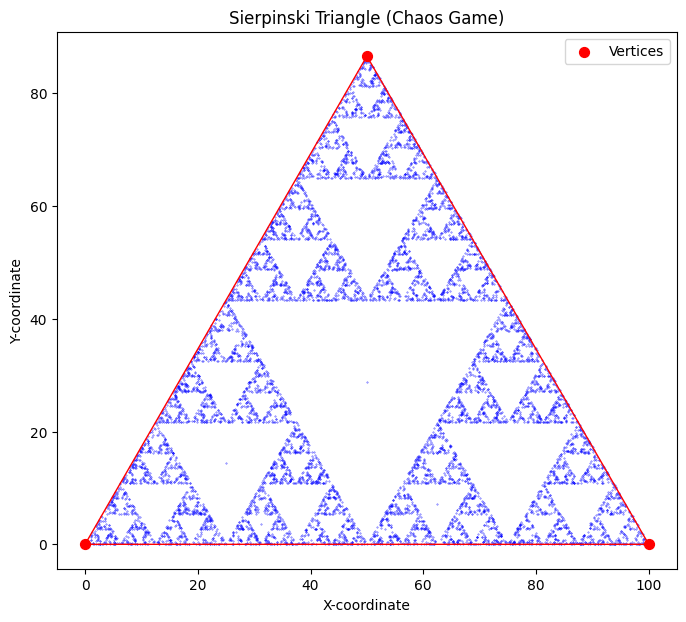

In [18]:
# Import the numpy library for numerical operations, aliasing it as 'np'
import numpy as np
# Import the matplotlib.pyplot module for plotting, aliasing it as 'plt'
import matplotlib.pyplot as plt

# Define the coordinates of the three vertices of an equilateral triangle
# V1: Bottom-left vertex
V1 = np.array([0.0, 0.0])
# V2: Bottom-right vertex
V2 = np.array([100.0, 0.0])
# V3: Top vertex, calculated to form an equilateral triangle with side length 100
V3 = np.array([50.0, 100.0 * np.sqrt(3)/2]) # Height of equilateral triangle = side * sqrt(3)/2

# Store the vertices in a list for easy access
vertices = [V1, V2, V3]

# Choose an arbitrary starting point P within the triangle
# Here, the centroid (average of vertex coordinates) is used as the initial point
P = (V1 + V2 + V3) / 3.0

# Initialize lists to store the x and y coordinates of all generated points
points_x = [P[0]]
points_y = [P[1]]

# Set the number of iterations to generate points
num_iterations = 10000

# Loop to generate points based on the "Chaos Game" algorithm
for _ in range(num_iterations):
    # Select a random integer (1, 2, or 3) to choose one of the three vertices
    r = np.random.rand() # Generate a random float between 0.0 and 1.0
    n = int(1 + 3 * r) # Map r to an integer 1, 2, or 3

    # Select the target vertex based on the random integer 'n'
    target_vertex = vertices[n - 1]

    # Calculate the next point P as the midpoint between the current point P and the target vertex
    P = 0.5 * (P + target_vertex)

    # Store the coordinates of the newly generated point
    points_x.append(P[0])
    points_y.append(P[1])

# Plotting section
# Create a figure with a specified size
plt.figure(figsize=(8, 8))
# Plot all generated points as a scatter plot
plt.scatter(points_x, points_y, s=0.1, color='blue', alpha=0.8)

# Plot the outline of the triangle vertices for reference
plt.plot([V1[0], V2[0], V3[0], V1[0]], [V1[1], V2[1], V3[1], V1[1]], 'r-', linewidth=1)
# Plot the vertices as distinct red circles
plt.scatter([V1[0], V2[0], V3[0]], [V1[1], V2[1], V3[1]], color='red', marker='o', s=50, label='Vertices')

# Add a title to the plot
plt.title('Sierpinski Triangle (Chaos Game)')
# Add labels for the x and y axes
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
# Ensure the aspect ratio is equal so the triangle doesn't look stretched
plt.gca().set_aspect('equal', adjustable='box')
# Display the legend for the vertices
plt.legend()
# Show the plot
plt.show()